In [6]:
%matplotlib inline 

import skimage
import numpy as np
from IPython.display import display
from IPython.html.widgets import interact, fixed, widget

def edit_image(img="coffee", sigma=0, r=1.0, g=1.0, b=1.0):
    image = getattr(skimage.data, img)()
    if sigma != 0.0:
        image = filter.gaussian_filter(image, sigma=sigma, multichannel=True)
        new_image = image * [r,g,b]
    else:
        # pixel values between 0 and 256 need to be ints
        new_image = np.array(image * [r,g,b], dtype=int)
    display(skimage.io.Image(new_image))
    return new_image

lims = (0.0,1.0,0.01)
interact(edit_image, img=("coffee", "lena", "hubble_deep_field"), sigma=(0, 3, 0.2), r=lims, g=lims, b=lims)

AttributeError: 'module' object has no attribute 'data'

<function __main__.edit_image>

http://nbviewer.ipython.org/github/ipython/ipython-in-depth/blob/master/examples/Interactive%20Widgets/Using%20Interact.ipynb

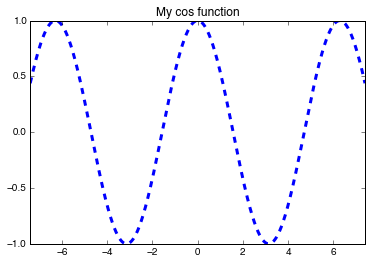

In [4]:
import matplotlib.pyplot as plt
@interact(fun=('sin', 'cos', 'arctan'),  # dropdown menu
          title='my function',  # text area
          dashed=False,  # checkbox
          xscale=(.1, 100.))  # float slider

def complex_plot(fun='sin', 
                 title='sine', 
                 dashed=False, 
                 xscale=5.):
    
    f = getattr(np, fun)
    t = np.linspace(-xscale, +xscale, 1000)
    s = '--' if dashed else '-'
    
    plt.plot(t, f(t), s, lw=3);
    plt.xlim(-xscale, +xscale);
    plt.title(title);

In [7]:
interact(complex_plot,
         title='my function',
         xscale=(.1, 100.),
         fun=widgets.RadioButtonsWidget(values=['sin', 'cos', 'arctan']),
         dashed=widgets.ToggleButtonWidget(),);

NameError: name 'widgets' is not defined

---
Following lines extracted from a notebook by Cyrille Rossant

## Making matplotlib figures interactive in the notebook

The [**mpld3**](http://mpld3.github.io) library allows you to make your matplotlib figures interactive in the notebook. It leverages the JavaScript visualization library [**d3.js**](http://d3js.org/) by converting a matplotlib figure into an abstract representation that is understood by d3.js.

Now, we import mpld3. If this fails, type in a terminal: pip install mpld3

In [8]:
import mpld3
mpld3.enable_notebook()

All we have to do now is create a normal matplotlib plot. It will show up directly in the notebook as an interactive figure.

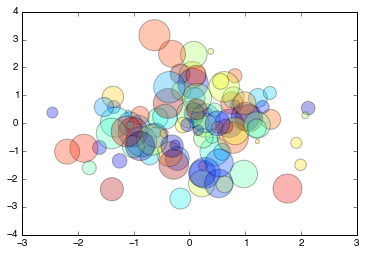

In [9]:
N = 100
scatter = plt.scatter(np.random.normal(size=N),
                      np.random.normal(size=N),
                      c=np.random.random(size=N),
                      s=1000 * np.random.random(size=N),
                      alpha=0.3,
                      cmap=plt.cm.jet)

Click on the small arrow on the bottom left to pan and zoom in the figure.

## A crash course on d3.js

d3.js is a popular visualization library in JavaScript. In principle, it has nothing to do with Python. Yet, we will see here how to mix Python and d3.js in the IPython notebook.

First, let's show three discs with [**SVG**](http://en.wikipedia.org/wiki/Scalable_Vector_Graphics). To show SVG figures in the IPython notebook, we can use the `%%SVG` cell magic.

> SVG is a XML-based **vector image format** understood by all modern browsers.

In [17]:
%%SVG
<svg id="svg" height="60">
  <circle cx="40" cy="30" r="10" />
  <circle cx="80" cy="30" r="10" />
  <circle cx="120" cy="30" r="10" />
</svg>

Now, let's show how to manipulate dynamically these objects with d3.js. This all happens client-side, in the browser. At this point, Python knows nothing about what we're doing here.

In [18]:
%%javascript
require.config({paths: {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {

    // We select the #svg element.
    var svg = d3.select("#svg");

    // We select all circles...
    var circle = svg.selectAll("circle")
                    // and we assign them some data.
                    .data(["red", "green", "blue"]);

    // Now, we assign the "fill" attribute of each circle to 
    // the value associated to it, and the "r" attribute
    // to some value depending on the data.
    circle.transition().duration(10000).
        attr("fill", function(d) { return d; }).
        attr("r", function(d) { return 4*d.length; });
    
});

<IPython.core.display.Javascript object>

In d3.js, the central idea is to bind data values to visual objects. Here, we assign a string to each circle. Then, we can assign graphical attributes of the objects as a function of the data items associated to them.

Animations can be easily added. Here, we just need to add `transition().duration(1000).` after `circle.`.